<h2> Fiber Optic Channel Modelling </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h4> Function for obtaining train,test, validate datasets from total dataset</h4>

In [2]:
def obtain_datasets(fraction):
    # Helper function to load a fraction of the dataset
    def load_fraction(file_path, fraction):
        # Load the entire dataset
        full_data = pd.read_csv(file_path, sep=r'\s+', header=None, names=["Time", "Amplitude"]).to_numpy()
        
        # Calculate the number of rows to load
        num_rows = int(len(full_data) * fraction)
        
        # Select the first `num_rows` rows (contiguous block)
        sampled_data = full_data[:num_rows]
        
        return sampled_data

    # Load sub-versions of each dataset
    pam_input_data = load_fraction("../data/PAM-4 Input Data.txt", fraction)
    pam_output_data = load_fraction("../data/PAM-4 Output Data.txt", fraction)

    qpsk_input_data = load_fraction("../data/QPSK Input Data.txt", fraction)
    qpsk_output_data = load_fraction("../data/QPSK Output Data.txt", fraction)

    qam_input_data = load_fraction("../data/16-QAM Input Data.txt", fraction)
    qam_output_data = load_fraction("../data/16-QAM Output Data.txt", fraction)

    # Helper function to split into train, validation, and test sets
    def obtain_train_validate_test(data):
        # Compute sizes
        train_size = int(0.7 * len(data))
        val_size = int(0.15 * len(data))
        test_size = len(data) - train_size - val_size

        # Perform splits
        train_data = data[:train_size]
        val_data = data[train_size:train_size + val_size]
        test_data = data[train_size + val_size:]

        return train_data, val_data, test_data

    # Split PAM datasets
    pam_train_input, pam_val_input, pam_test_input = obtain_train_validate_test(pam_input_data)
    pam_train_output, pam_val_output, pam_test_output = obtain_train_validate_test(pam_output_data)

    # Split QPSK datasets
    qpsk_train_input, qpsk_val_input, qpsk_test_input = obtain_train_validate_test(qpsk_input_data)
    qpsk_train_output, qpsk_val_output, qpsk_test_output = obtain_train_validate_test(qpsk_output_data)

    # Split QAM datasets
    qam_train_input, qam_val_input, qam_test_input = obtain_train_validate_test(qam_input_data)
    qam_train_output, qam_val_output, qam_test_output = obtain_train_validate_test(qam_output_data)

    # Organize everything into a dictionary for easy access
    datasets = {
        "PAM": {
            "train": (pam_train_input, pam_train_output),
            "validate": (pam_val_input, pam_val_output),
            "test": (pam_test_input, pam_test_output)
        },
        "QPSK": {
            "train": (qpsk_train_input, qpsk_train_output),
            "validate": (qpsk_val_input, qpsk_val_output),
            "test": (qpsk_test_input, qpsk_test_output)
        },
        "QAM": {
            "train": (qam_train_input, qam_train_output),
            "validate": (qam_val_input, qam_val_output),
            "test": (qam_test_input, qam_test_output)
        }
    }

    return datasets


<h4> Testing this function out, and plotting input vs output data</h4>

PAM Training Input Shape: (29360, 2)
PAM Training Output Shape: (29360, 2)


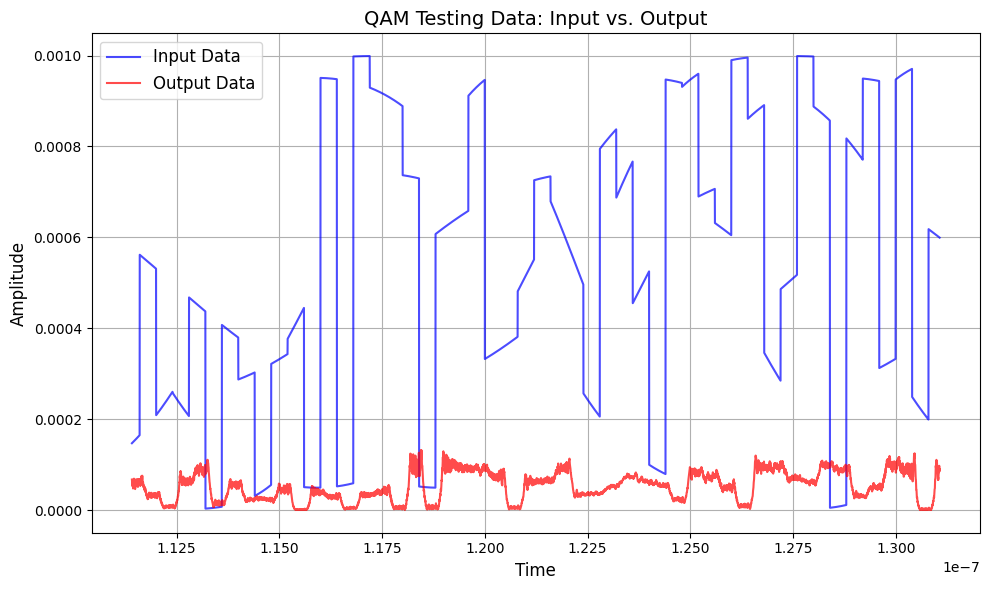

In [19]:
# Specify the fraction of data to use (e.g., 0.1 for 10%)
fraction = 0.04

# Get the datasets
datasets = obtain_datasets(fraction)

# Access the PAM training dataset
pam_train_input, pam_train_output = datasets["PAM"]["train"]

# Access the QPSK validation dataset
qpsk_val_input, qpsk_val_output = datasets["QPSK"]["validate"]

# Access the QAM test dataset
qam_test_input, qam_test_output = datasets["QAM"]["test"]

print("PAM Training Input Shape:", pam_train_input.shape)
print("PAM Training Output Shape:", pam_train_output.shape)

# Plot the PAM training data
plt.figure(figsize=(10, 6))

# Input data plot
plt.plot(qam_test_input[:, 0], qam_test_input[:, 1], label="Input Data", color="blue", alpha=0.7)

# Output data plot
plt.plot(qam_test_output[:, 0], qam_test_output[:, 1], label="Output Data", color="red", alpha=0.7)

# Add labels and legend
plt.title("QAM Testing Data: Input vs. Output", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


<h4> Normalizing the input and output data</h4>

Okay so now we need to normalize the data. We need to do normalization and then denormalization at the output. The technique we will use in min-max normalization. We don't normalize the time column, just the amplitude column

In [9]:
def min_max_normalize(data):
    """
    Apply Min-Max normalization to an array.
    
    Parameters:
        data (numpy.ndarray): The array to be normalized.
        
    Returns:
        numpy.ndarray: Min-max normalized array.
    """
    X_min = np.min(data)
    X_max = np.max(data)
    
    if X_max == X_min:
        return np.zeros_like(data)  # Prevent division by zero if all values are the same
    
    return (data - X_min) / (X_max - X_min)

Normalized Input: [[1.11409375e-07 1.44453075e-01]
 [1.11412500e-07 1.44734626e-01]
 [1.11415625e-07 1.45016667e-01]
 [1.11418750e-07 1.45299201e-01]
 [1.11421875e-07 1.45582225e-01]]
Normalized Output: [[1.11409375e-07 5.09155759e-01]
 [1.11412500e-07 4.64159158e-01]
 [1.11415625e-07 4.55898095e-01]
 [1.11418750e-07 4.62919253e-01]
 [1.11421875e-07 4.18321426e-01]]


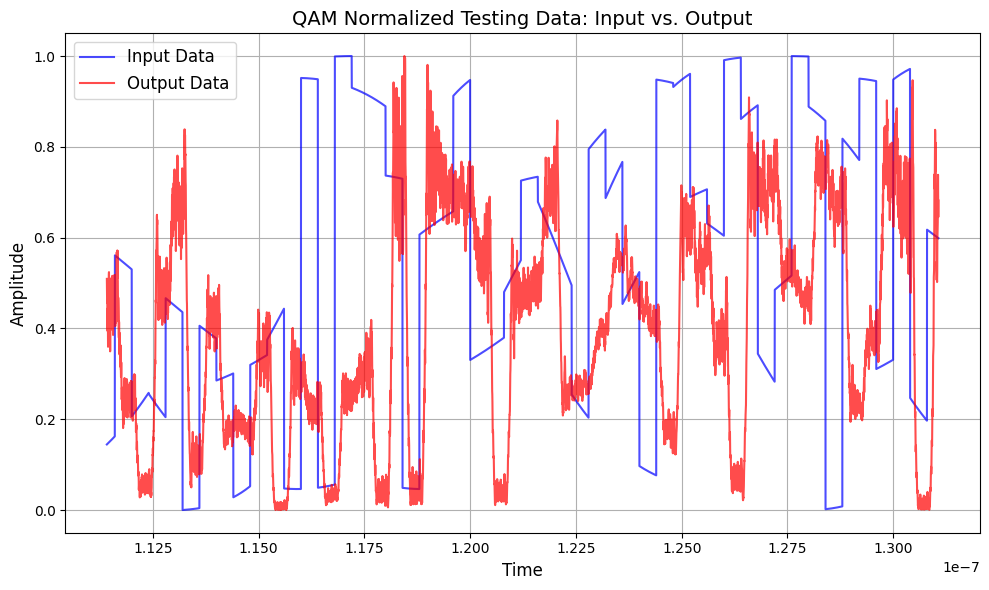

In [22]:
qam_test_input_norm = min_max_normalize_with_time(qam_test_input[:, 0], qam_test_input[:, 1])
qam_test_output_norm = min_max_normalize_with_time(qam_test_output[:, 0], qam_test_output[:, 1])  

# Print first few values to check
print("Normalized Input:", qam_test_input_norm[:5])
print("Normalized Output:", qam_test_output_norm[:5])


plt.figure(figsize=(10, 6))

# Input data plot
plt.plot(qam_test_input_norm[:, 0], qam_test_input_norm[:, 1], label="Input Data", color="blue", alpha=0.7)

# Output data plot
plt.plot(qam_test_output_norm[:, 0], qam_test_output_norm[:, 1], label="Output Data", color="red", alpha=0.7)

# Add labels and legend
plt.title("QAM Normalized Testing Data: Input vs. Output", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
